### read data

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data=pd.read_csv("../Data/fake_news_dataset.csv")

In [3]:
data.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,3/10/2023,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,5/25/2022,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,9/1/2022,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2/7/2023,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,4/3/2023,CNN,Austin Walker,Technology,fake


In [4]:
data["label"].value_counts()

label
fake    10056
real     9944
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

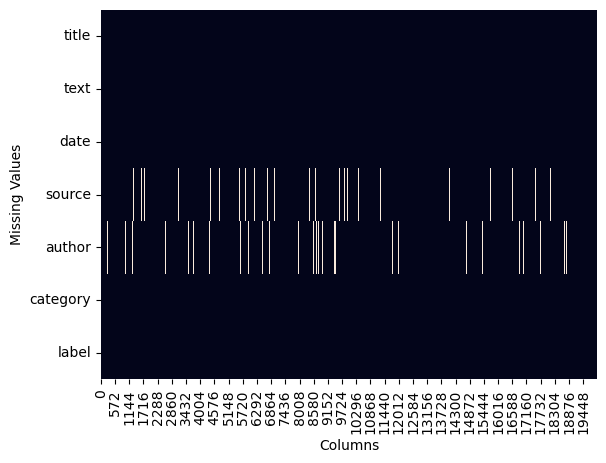

In [5]:
ax = plt.axes()
sns.heatmap(data.isna().transpose() , cbar=False , ax=ax)
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.show

In [6]:
data.shape

(20000, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   text      20000 non-null  object
 2   date      20000 non-null  object
 3   source    19000 non-null  object
 4   author    19000 non-null  object
 5   category  20000 non-null  object
 6   label     20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


### Cheak source    

In [8]:
data["source"].value_counts()

source
Daily News      2439
BBC             2393
The Guardian    2382
CNN             2375
NY Times        2372
Fox News        2362
Reuters         2360
Global Times    2317
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Real vs Fake per Source')

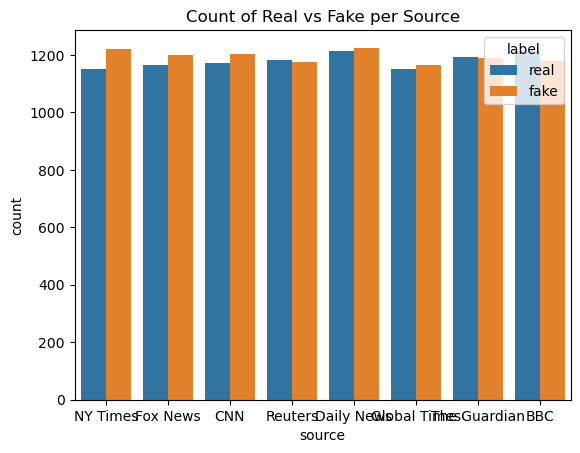

In [9]:
data["source"].value_counts()
sns.countplot(data=data, x="source", hue="label")
plt.title("Count of Real vs Fake per Source")

### Cheak author    

In [10]:
data["author"].value_counts()

author
Michael Smith          12
John Smith             11
Christopher Johnson     9
Jennifer Davis          7
Michael Lee             7
                       ..
Andrew Stark            1
Samuel Gates            1
Kristen Buchanan        1
Deborah Leon            1
David Wise              1
Name: count, Length: 17051, dtype: int64

### Cheak category      

In [11]:
cate_count=data["category"].value_counts()

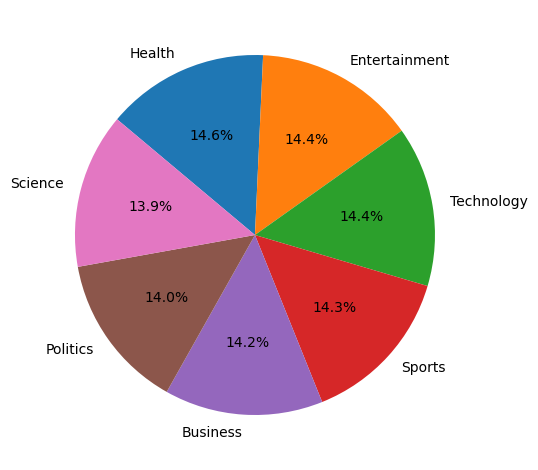

In [12]:
plt.pie(cate_count, labels=cate_count.index,
        autopct='%1.1f%%', startangle=140, counterclock=False)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Count of Real vs Fake per category')

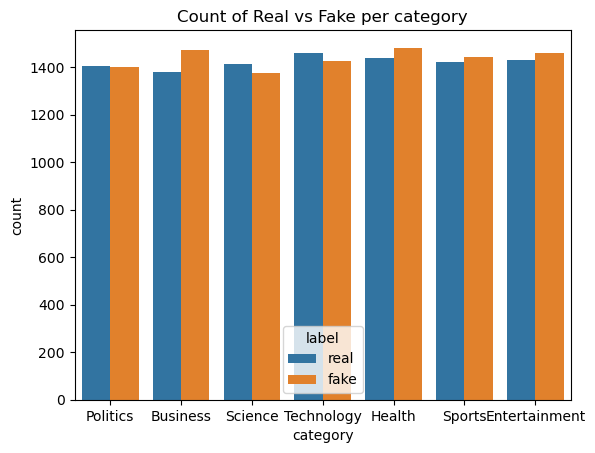

In [13]:
sns.countplot(data=data, x="category", hue="label")
plt.title("Count of Real vs Fake per category")

### Cheak date   

In [14]:
data["date"].value_counts()   

date
8/31/2023     32
12/20/2022    31
3/4/2024      30
2/19/2025     30
6/21/2022     30
              ..
10/14/2024     8
6/15/2024      8
4/17/2023      7
4/4/2025       7
8/11/2023      6
Name: count, Length: 1096, dtype: int64

In [15]:
data["date_2"] = pd.to_datetime(data["date"], errors='coerce')

In [16]:
data["years"] = data["date_2"].dt.year
data["months"] = data["date_2"].dt.month

In [17]:
data.head()

,title,text,date,source,author,category,label,date_2,years,months
0,Foreign Democrat final.,more tax development both store agreement lawy...,3/10/2023,NY Times,Paula George,Politics,real,2023-03-10,2023,3
1,To offer down resource great point.,probably guess western behind likely next inve...,5/25/2022,Fox News,Joseph Hill,Politics,fake,2022-05-25,2022,5
2,Himself church myself carry.,them identify forward present success risk sev...,9/1/2022,CNN,Julia Robinson,Business,fake,2022-09-01,2022,9
3,You unit its should.,phone which item yard Republican safe where po...,2/7/2023,Reuters,Mr. David Foster DDS,Science,fake,2023-02-07,2023,2
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,4/3/2023,CNN,Austin Walker,Technology,fake,2023-04-03,2023,4


In [18]:
data["years"].value_counts()

years
2023    6696
2024    6685
2022    4555
2025    2064
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Real vs Fake per Source')

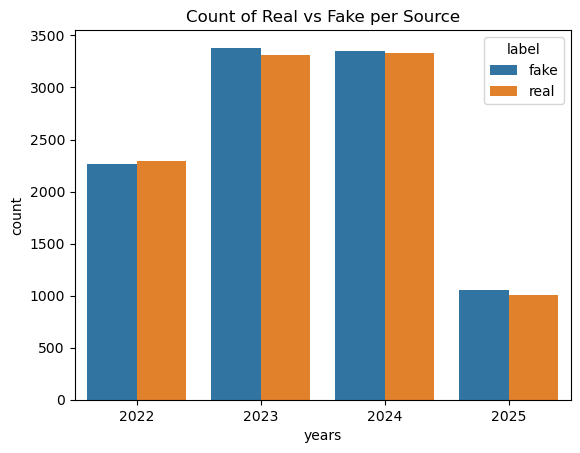

In [19]:
sns.countplot(data=data, x="years", hue="label")
plt.title("Count of Real vs Fake per Source")

In [20]:
data["months"].value_counts()

months
11    1768
1     1729
8     1700
7     1699
12    1697
10    1696
3     1685
5     1669
4     1614
6     1607
2     1580
9     1556
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Real vs Fake per Source')

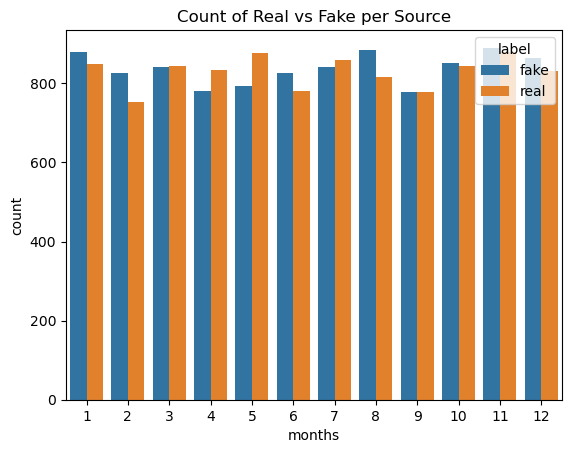

In [21]:
sns.countplot(data=data, x="months", hue="label")
plt.title("Count of Real vs Fake per Source")

### Cheak Text 

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     20000 non-null  object        
 1   text      20000 non-null  object        
 2   date      20000 non-null  object        
 3   source    19000 non-null  object        
 4   author    19000 non-null  object        
 5   category  20000 non-null  object        
 6   label     20000 non-null  object        
 7   date_2    20000 non-null  datetime64[ns]
 8   years     20000 non-null  int32         
 9   months    20000 non-null  int32         
dtypes: datetime64[ns](1), int32(2), object(7)
memory usage: 1.4+ MB


In [23]:
data["word_in_text"]= data["text"].str.split().str.len()

In [24]:
data.sample(5)

,title,text,date,source,author,category,label,date_2,years,months,word_in_text
1332,Easy his human they.,relationship every assume current throw common...,11/5/2023,BBC,Juan Kennedy,Science,real,2023-11-05,2023,11,220
366,Consumer national nearly against main able tax...,car every operation show race man election dat...,6/23/2024,Global Times,Mary Lopez,Science,fake,2024-06-23,2024,6,277
7730,Recent in safe her result.,charge agent seek policy lose onto ever city r...,3/31/2024,Daily News,Susan Peters,Politics,fake,2024-03-31,2024,3,206
3241,Officer fine my.,major own four once charge assume draw make pa...,1/14/2025,Global Times,David Palmer,Entertainment,fake,2025-01-14,2025,1,267
3208,Why crime life fight each.,live high might best yeah time author gun impa...,7/21/2024,NaN,Manuel Padilla,Health,fake,2024-07-21,2024,7,262


In [25]:
top_words_in_text = data["word_in_text"].value_counts().nsmallest(20)
min_words_in_text = data["word_in_text"].value_counts().nlargest(20)

<Axes: ylabel='word_in_text'>

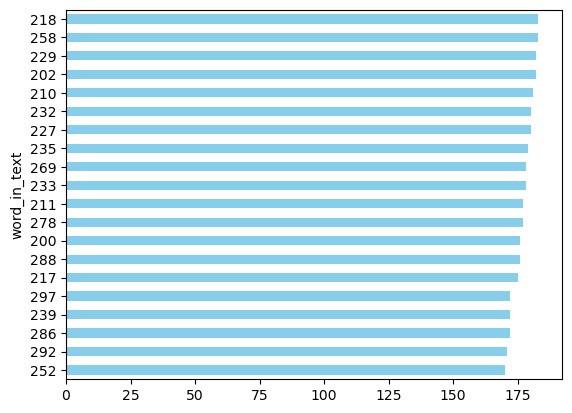

In [26]:
top_words_in_text.plot(kind='barh', color='skyblue')

<Axes: ylabel='word_in_text'>

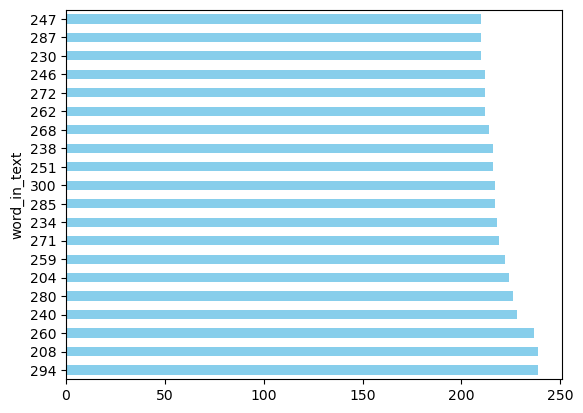

In [27]:
min_words_in_text.plot(kind='barh', color='skyblue')

In [28]:
min_word_count=data["word_in_text"].min()
max_word_count=data["word_in_text"].max()
print(min_word_count)
print(max_word_count)

200
300


In [29]:
data.loc[data["word_in_text"].between(200,300), "word_in_text"]

0        216
1        238
2        222
3        247
4        215
        ... 
19995    292
19996    258
19997    239
19998    245
19999    222
Name: word_in_text, Length: 20000, dtype: int64

Text(0.5, 1.0, 'Count of Real vs Fake per word_in_text')

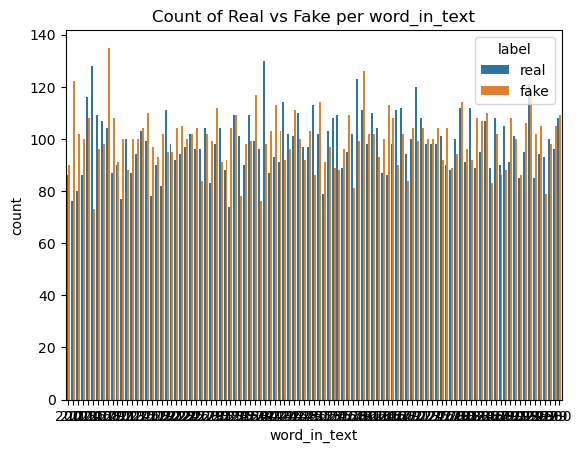

In [30]:
sns.countplot(data=data, x="word_in_text", hue="label")
plt.title("Count of Real vs Fake per word_in_text")

## (date<years-months> , author , word_in_text) Don't Effect on Label Prediction

## Data Spliting

### Business - CNN

In [276]:
df = data[(data["category"] == "Business") & (data["source"] == "CNN")]
df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df
X = df['full_text']      
y = df['label']  
X = df['full_text']      
y = df['label']  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)


C:\Users\KimoStore\AppData\Local\Temp\ipykernel_21260\344267512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')


### CNN - Sport

In [266]:
df = data[(data["category"] == "Sports") & (data["source"] == "CNN")]
df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df
X = df['full_text']      
y = df['label']  
X = df['full_text']      
y = df['label']  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

C:\Users\KimoStore\AppData\Local\Temp\ipykernel_21260\3185863854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')


### Science - Daily News

In [268]:
df = data[(data["category"] == "Science") & (data["source"] == "Daily News")]
df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df
X = df['full_text']      
y = df['label']  
X = df['full_text']      
y = df['label']  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)


C:\Users\KimoStore\AppData\Local\Temp\ipykernel_21260\2641314730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')


### Politics - Reuters

In [270]:
df = data[(data["category"] == "Politics") & (data["source"] == "Reuters")]
df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df
X = df['full_text']      
y = df['label']  
X = df['full_text']      
y = df['label']  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)


C:\Users\KimoStore\AppData\Local\Temp\ipykernel_21260\1995446547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')


## Model

C:\Users\KimoStore\AppData\Local\Temp\ipykernel_21260\3455083606.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].str.strip().str.lower()


Best Threshold = 0.082
Best Cross-Validated Accuracy = 68.41%
Classification Report:
              precision    recall  f1-score   support

        real       0.66      0.87      0.75       170
        fake       0.74      0.45      0.56       137

    accuracy                           0.68       307
   macro avg       0.70      0.66      0.66       307
weighted avg       0.70      0.68      0.67       307



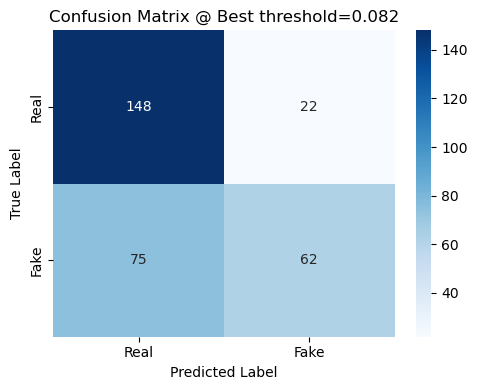

In [274]:
import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# ================================

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))



def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    tokens = [
    lemmatizer.lemmatize(word) 
    for word in tokens if word not in stop_words
]
    return " ".join(tokens)

# ================================

df['label'] = df['label'].str.strip().str.lower()
documents = df['full_text'].apply(clean_text).tolist()
labels = df['label'].tolist()
y = [1 if label == 'fake' else 0 for label in labels]

# ================================

vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 1))
X = vectorizer.fit_transform(documents)
vocab = vectorizer.get_feature_names_out()
X_array = X.toarray()

# ================================

fake_indices = [i for i, label in enumerate(labels) if label == 'fake']
real_indices = [i for i, label in enumerate(labels) if label == 'real']

fake_mean = np.mean(X_array[fake_indices], axis=0)
real_mean = np.mean(X_array[real_indices], axis=0)

word_scores = fake_mean - real_mean

df_keywords = pd.DataFrame({
    "word": vocab,
    "fake_score": word_scores
}).sort_values(by="fake_score", ascending=False)

# ================================

thresholds = [0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09]
k = 12 # 
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

best_accuracy = -1
best_threshold = None
best_model = None
best_vectorizer = None
best_y_pred = None
best_y_test = None

for threshold in thresholds:
    important_words = df_keywords[df_keywords["fake_score"] > threshold]["word"].tolist()

    if len(important_words) < 5:
        continue

    vectorizer_filtered = CountVectorizer(vocabulary=important_words)
    X_filtered = vectorizer_filtered.fit_transform(documents)

    accuracies = []
    all_preds = []
    all_trues = []

    for train_index, test_index in kf.split(X_filtered, y):
        X_train, X_test = X_filtered[train_index], X_filtered[test_index]
        y_train = np.array(y)[train_index]
        y_test = np.array(y)[test_index]

        model = RandomForestClassifier(
            class_weight='balanced',
            n_estimators=100,
            random_state=42,
            criterion='entropy'
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        all_preds.extend(y_pred)
        all_trues.extend(y_test)

    avg_acc = np.mean(accuracies)

    if avg_acc > best_accuracy:
        best_accuracy = avg_acc
        best_threshold = threshold
        best_model = model
        best_vectorizer = vectorizer_filtered
        best_y_pred = all_preds
        best_y_test = all_trues

# ================================

print("=" * 60)
print(f"Best Threshold = {best_threshold}")
print(f"Best Cross-Validated Accuracy = {round(best_accuracy * 100, 2)}%")
print("Classification Report:")
print(classification_report(best_y_test, best_y_pred, target_names=["real", "fake"]))

# ================================

cm = confusion_matrix(best_y_test, best_y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Real", "Fake"],
            yticklabels=["Real", "Fake"])
plt.title(f"Confusion Matrix @ Best threshold={best_threshold}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


###### kcv -> 12 (340 instance)

###### Random Choices :
###### Business - CNN  -> [ Accuracy = 69.97% ]
###### CNN - Sport ->     [ Accuracy = 69.39% ]
###### Science - Daily News -> [ Accuracy = 69.26% ]
###### Politics - Reuters -> [ Accuracy = 68.41% ]